In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as pl
import pysal as ps
import mplleaflet
import zipfile
from scipy import stats
import numpy as np
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn import preprocessing
from sklearn import cluster

In [3]:
zips = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zips = pd.DataFrame({'ZIP': zips['postalCode'].astype(int)}).drop_duplicates().sort('ZIP')

In [4]:
years = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03',
        '04', '05', '06', '07', '08', '09', '10', '11', '12','13']


In [5]:
census = []
est = {}

for i in years:
    file_path = 'zbp%stotals.zip' % i
    census_zip = zipfile.ZipFile(file_path) 
    year = pd.read_csv(census_zip.open(file_path.replace('.zip','.txt')))
    year.columns = [x.upper() for x in year.columns]
    year = year[['ZIP', 'EST']]
    year = year.rename(columns = {'EST':i})
    census.append(year)

est[0] = census[0]

for i in range(1,20):
    est[i] = pd.merge(census[i], est[i-1], on=['ZIP']) 
    
census_data = est[19]
census_data = census_data.set_index('ZIP', drop = True)
census_data = census_data.reindex_axis([['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', 
                                     '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']], axis=1)

census_data

,94,95,96,97,98,99,00,01,02,03,04,05,06,07,08,09,10,11,12,13
ZIP,,,,,,,,,,,,,,,,,,,,
1001,439,439,433,457,444,469,493,490,490,505,500,509,509,503,477,458,448,436,453,439
1002,450,467,487,500,490,558,563,587,566,586,584,589,582,596,584,571,570,558,572,572
1003,10,10,13,15,14,13,13,13,15,16,15,12,12,16,17,16,16,16,15,15
1004,47,48,47,41,31,35,48,37,23,21,43,31,30,20,18,18,21,19,16,16
1005,92,95,101,104,95,82,86,90,94,93,97,94,98,106,97,87,96,91,94,97
1007,182,172,183,183,183,194,219,228,212,230,232,225,238,243,246,230,238,217,217,221
1008,18,19,14,17,18,18,21,27,28,25,21,19,18,18,16,20,21,20,18,18
1009,14,16,15,18,17,14,17,20,19,22,20,22,21,18,19,18,15,14,16,16
1010,50,53,62,64,63,71,73,72,70,68,66,64,78,74,75,77,75,79,78,73


In [6]:
#census_data.to_csv('census_data.csv')
#converted the above data into a new csv and then reimported it back in, with some changes

In [7]:
data = pd.read_csv('census_data.csv')

In [8]:
data

,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,1001,439,439,433,457,444,469,493,490,490,...,500,509,509,503,477,458,448,436,453,439
1,1002,450,467,487,500,490,558,563,587,566,...,584,589,582,596,584,571,570,558,572,572
2,1003,10,10,13,15,14,13,13,13,15,...,15,12,12,16,17,16,16,16,15,15
3,1004,47,48,47,41,31,35,48,37,23,...,43,31,30,20,18,18,21,19,16,16
4,1005,92,95,101,104,95,82,86,90,94,...,97,94,98,106,97,87,96,91,94,97
5,1007,182,172,183,183,183,194,219,228,212,...,232,225,238,243,246,230,238,217,217,221
6,1008,18,19,14,17,18,18,21,27,28,...,21,19,18,18,16,20,21,20,18,18
7,1009,14,16,15,18,17,14,17,20,19,...,20,22,21,18,19,18,15,14,16,16
8,1010,50,53,62,64,63,71,73,72,70,...,66,64,78,74,75,77,75,79,78,73
9,1011,16,18,19,13,15,16,17,26,22,...,14,17,15,17,15,16,17,16,16,13


In [9]:
all_data = pd.merge(data, zips, on='ZIP')

In [10]:
all_data

,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
4,10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,...,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296
5,10006,1061,1002,969,990,1030,1059,1067,1026,934,...,869,870,874,863,845,828,843,834,850,852
6,10007,1307,1274,1254,1287,1282,1303,1327,1233,1620,...,1635,1311,1292,1284,1313,1277,1330,1368,1400,1424
7,10009,634,633,673,747,786,804,860,869,921,...,982,1029,1016,1027,1066,1049,1090,1128,1176,1220
8,10010,3019,2987,3029,3112,3152,3143,3203,3178,3085,...,3059,3060,3047,2948,3000,2938,2981,3022,3068,3091
9,10011,3301,3340,3392,3541,3599,3664,3653,3592,3682,...,3729,3784,3823,3818,3887,3823,3852,3869,3841,3905


In [11]:
Nclusters = 5

In [12]:
all_data.shape

(230, 21)

In [13]:
#all_data = all_data.set_index('ZIP', drop=True)

In [14]:
all_data.shape

(230, 21)

In [15]:
all_data_matrix = all_data.as_matrix().astype(float)

In [16]:
all_data_matrix

array([[ 10001.,   6999.,   7088., ...,   7227.,   7235.,   7273.],
       [ 10002.,   1784.,   1819., ...,   2912.,   2954.,   2988.],
       [ 10003.,   3256.,   3377., ...,   4159.,   4214.,   4277.],
       ..., 
       [ 11693.,     95.,     90., ...,    131.,    129.,    127.],
       [ 11694.,    294.,    285., ...,    326.,    326.,    327.],
       [ 11697.,     33.,     32., ...,     46.,     49.,     40.]])

In [17]:
all_data_matrix.shape

(230, 21)

In [18]:
new_matrix = preprocessing.scale(np.array(all_data_matrix), axis=1)

In [19]:
print new_matrix.shape, new_matrix.mean(axis=1), new_matrix.std(axis=1)

(230, 21) [  3.09276414e-16  -1.24239243e-16   2.96059473e-16   4.22942105e-17
   4.49375986e-17  -3.70074342e-17   1.85037171e-17   3.89899753e-17
   2.64338815e-17   1.00448750e-16   3.83291282e-17  -1.55959901e-16
  -9.25185854e-18  -8.85535032e-17   4.12368552e-16   2.90772697e-17
  -3.48927236e-16  -7.93016446e-17   6.34413157e-17  -5.33964407e-16
   1.01770444e-16   1.00448750e-16   1.54638207e-16  -9.25185854e-18
  -5.08852220e-17  -5.15460690e-17   4.82418338e-17   1.05735526e-17
   3.17206578e-17   7.40148683e-17  -1.18952467e-17   7.93016446e-18
  -1.58603289e-17   2.84164227e-16   1.05735526e-17   3.17206578e-17
  -5.28677631e-18   2.11471052e-17  -3.96508223e-17   5.28677631e-18
   1.32169408e-18  -3.17206578e-17   5.81545394e-17  -3.43640460e-17
   2.77555756e-17   2.51121875e-17  -3.03989638e-17   2.77555756e-17
   4.49375986e-17  -1.58603289e-17   0.00000000e+00   2.24687993e-17
  -2.51121875e-17  -7.66582565e-17   3.30423519e-17  -1.71820230e-17
  -3.70074342e-17  -2.11

In [20]:
#5 clusters to start
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(new_matrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
#assigning the labels and centers to new variables
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [22]:
print centroids

[[  4.46930021e+00  -2.57539912e-01  -2.52897428e-01  -2.49483336e-01
   -2.43868440e-01  -2.40329885e-01  -2.38391267e-01  -2.32565333e-01
   -2.32384266e-01  -2.23374342e-01  -2.19851297e-01  -2.16708527e-01
   -2.15249364e-01  -2.15020164e-01  -2.14466915e-01  -2.12937097e-01
   -2.11638858e-01  -2.06714437e-01  -2.02385753e-01  -1.95315007e-01
   -1.88178579e-01]
 [  4.41756052e+00  -4.75538016e-01  -4.44984474e-01  -4.25863813e-01
   -3.70142853e-01  -3.32835291e-01  -3.18119981e-01  -2.87537246e-01
   -2.82317093e-01  -2.65217989e-01  -2.45682953e-01  -1.96171297e-01
   -1.70806820e-01  -1.51231344e-01  -1.08936786e-01  -1.04575082e-01
   -1.04740002e-01  -8.18371522e-02  -5.57402787e-02  -1.56468065e-02
    2.03647579e-02]
 [  3.59470488e+00  -5.53031521e-03   1.41909975e-02   7.84678686e-02
    2.82985186e-01   2.90289376e-01   2.42081722e-01   2.59611778e-01
    2.45733817e-01   3.01245660e-01   3.14393202e-01   3.88895939e-01
    4.16651861e-01   3.12201945e-01  -5.65761680e-

In [23]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [24]:
year = pd.date_range(1994, periods=20, freq='A')

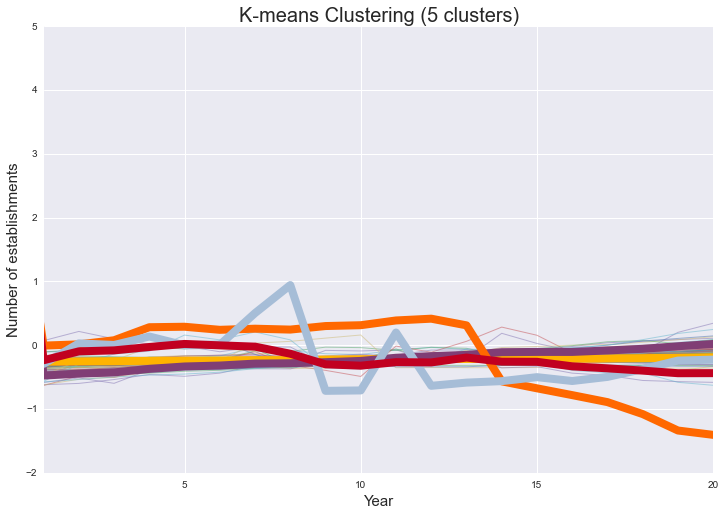

In [25]:
#plotting the clusters overlayed on time series
pl.figure(figsize=(12, 8))
for i in range(5):
    pl.plot(new_matrix[labels==i].transpose(), '-', linewidth=1, alpha=0.5)
for i in range(5):
    pl.plot(centroids[i], '-', linewidth=8, alpha=1, c=kelly_colors_hex[i])

xlim(1,20)
pl.xlabel("Year", fontsize=15)
pl.ylabel("Number of establishments", fontsize=15)
pl.title("K-means Clustering (5 clusters)", fontsize=20)

In [26]:
#7 clusters
k2 = 7
kmeans = cluster.KMeans(n_clusters=k2)
kmeans.fit(new_matrix)

labels2 = kmeans.labels_
centroids2 = kmeans.cluster_centers_

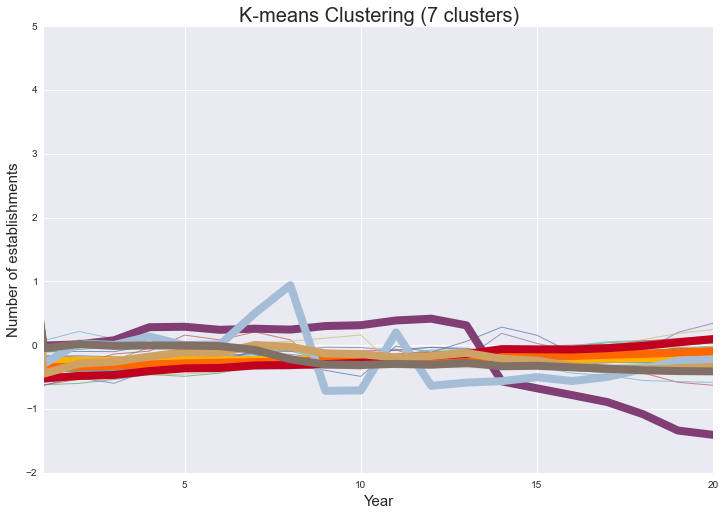

In [27]:
#plotting the clusters overlayed on time series
pl.figure(figsize=(12, 8))
for e in range(7):
    pl.plot(new_matrix[labels2==e].transpose(), '-', linewidth=1, alpha=0.7)
for e in range(7):
    pl.plot(centroids2[e], '-', linewidth=8, alpha=1,c=kelly_colors_hex[e])

xlim(1,20)
pl.xlabel("Year", fontsize=15)
pl.ylabel("Number of establishments", fontsize=15)
pl.title("K-means Clustering (7 clusters)", fontsize=20)


In [28]:
#choosing to cluster with affinity bc it is similar to kmeans, bc the outputs are labels and cluster centers
affinity = AffinityPropagation(damping=0.999)
affinity = affinity.fit(new_matrix)

In [29]:
#assigning the labels and centers to new variables
labelsAP = affinity.labels_
centroidsAP = affinity.cluster_centers_

In [30]:
print len(centroidsAP)
print labelsAP

23
[ 0  1  2 15 22 12 22 17 12 18 21  3 21  4  5  6  7 22  8  9 15 15 21 15 15
 22 21 22 15 15 15 22 15 10 22 12 22 22 22 12 22 22 11 12 12 12 12 12 12 12
 12 12 12 12 22 12 12 12 12 15 12 12 12 12 12 12 12 12 12 22 12 12 12 22 12
 12 12 12 12 12 12 12 12 12 12 22 13 22 14 22 22 22 22 22 15 15 22 22 21 22
 22 21 22 15 15 22 15 15 15 22 22 15 22 22 22 12 22 22 22 22 22 12 22 22 22
 22 22 22 22 12 15 22 21 22 15 22 15 15 18 15 18 21 21 15 15 15 15 16 15 15
 17 18 15 17 17 19 16 15 21 18 15 15 15 15 17 17 21 15 15 15 19 22 15 21 22
 20 19 15 22 21 12 22 15 22 12 22 15 22 22 21 22 22 22 21 21 15 15 15 15 15
 21 22 22 22 12 22 22 22 22 15 15 22 22 22 22 22 22 22 22 15 22 15 15 22 12
 22 12 22 22 12]


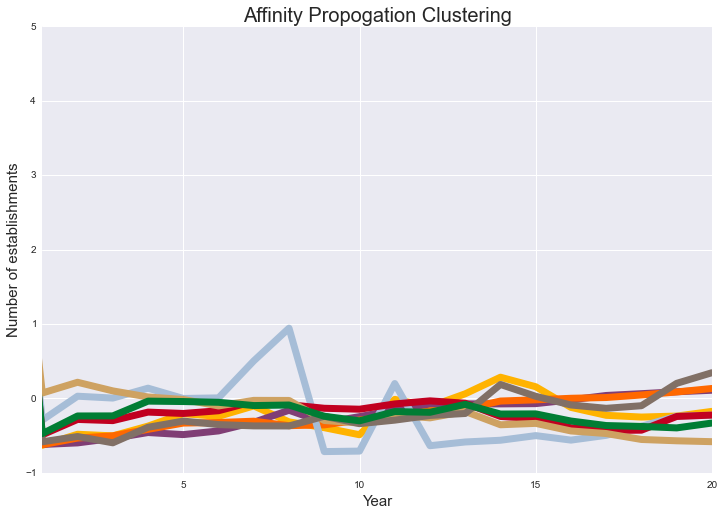

In [31]:
pl.figure(figsize=(12,8))
for r in range(8):
    pl.plot(new_matrix[labelsAP==r].transpose(), '-', linewidth=1, alpha=0.7)
for r in range(8):
    pl.plot(centroidsAP[r], '-', linewidth=7, alpha=1, c=kelly_colors_hex[r])

xlim(1,20)
pl.xlabel("Year", fontsize=15)
pl.ylabel("Number of establishments", fontsize=15)
pl.title("Affinity Propogation Clustering", fontsize=20)

In [32]:
nyc = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')

In [33]:
nyc

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.874400,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.913900,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.412340,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.057700,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.594300,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,42659399.898200,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...,11373
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9155180.262630,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11001
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,55587771.835000,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ...",11375
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,39568339.274800,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...,11427
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,25203458.868900,26323.994393,Queens,POLYGON ((-73.86451198956482 40.73407164841783...,11374


In [34]:
#create empty dataframe
K = pd.DataFrame(columns=('postalCode', 'kmeans_code'))
AP = pd.DataFrame(columns=('postalCode', 'AP_code'))


In [35]:
#need to be able to connect to nyc postalCode so i need to link it to original data
#im fixing the index in excel and then re-import it on next line

all_data.to_csv('fixing_index.csv')

In [36]:
#import csv
fixed_index = pd.read_csv('fixing_index.csv')

In [37]:
fixed_index['ZIP']

0      10001
1      10002
2      10003
3      10004
4      10005
5      10006
6      10007
7      10009
8      10010
9      10011
10     10012
11     10013
12     10014
13     10016
14     10017
15     10018
16     10019
17     10020
18     10021
19     10022
20     10023
21     10024
22     10025
23     10026
24     10027
25     10028
26     10029
27     10030
28     10031
29     10032
       ...  
200    11385
201    11411
202    11412
203    11413
204    11414
205    11415
206    11416
207    11417
208    11418
209    11419
210    11420
211    11421
212    11422
213    11423
214    11426
215    11427
216    11428
217    11429
218    11430
219    11432
220    11433
221    11434
222    11435
223    11436
224    11451
225    11691
226    11692
227    11693
228    11694
229    11697
Name: ZIP, dtype: int64

In [38]:
#put stuff in dataframe

K['postalCode'] = fixed_index['ZIP'].astype(str)
K['kmeansCode'] = labels

AP['postalCode'] = fixed_index['ZIP'].astype(str)
AP['APcode'] = labelsAP

In [39]:
K

,postalCode,kmeans_code,kmeansCode
0,10001,NaN,1
1,10002,NaN,1
2,10003,NaN,1
3,10004,NaN,0
4,10005,NaN,0
5,10006,NaN,0
6,10007,NaN,0
7,10009,NaN,1
8,10010,NaN,0
9,10011,NaN,1


In [40]:
nyc['postalCode']

0      11372
1      11004
2      11040
3      11426
4      11365
5      11373
6      11001
7      11375
8      11427
9      11374
10     11366
11     11423
12     11428
13     11432
14     11379
15     11429
16     11435
17     11415
18     11418
19     11433
20     11451
21     11221
22     11421
23     11419
24     11434
25     11216
26     11416
27     11233
28     11436
29     11213
       ...  
232    10106
233    10158
234    10041
235    10120
236    10278
237    10155
238    10022
239    10043
240    10081
241    10096
242    10097
243    10196
244    10196
245    10275
246    10265
247    10045
248    10047
249    10047
250    10080
251    10203
252    10259
253    10260
254    10285
255    10286
256    11370
257    10065
258    10075
259    10069
260    10281
261    10282
Name: postalCode, dtype: object

In [41]:
NYC = nyc.merge(K,on=['postalCode'])

In [42]:
NYC

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode,kmeans_code,kmeansCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.874400,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,NaN,0
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.913900,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,NaN,0
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.412340,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,NaN,0
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.057700,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,NaN,0
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.594300,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,NaN,0
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,42659399.898200,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...,11373,NaN,0
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9155180.262630,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11001,NaN,0
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,55587771.835000,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ...",11375,NaN,0
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,39568339.274800,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...,11427,NaN,0
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,25203458.868900,26323.994393,Queens,POLYGON ((-73.86451198956482 40.73407164841783...,11374,NaN,0


In [43]:
import mplleaflet

(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

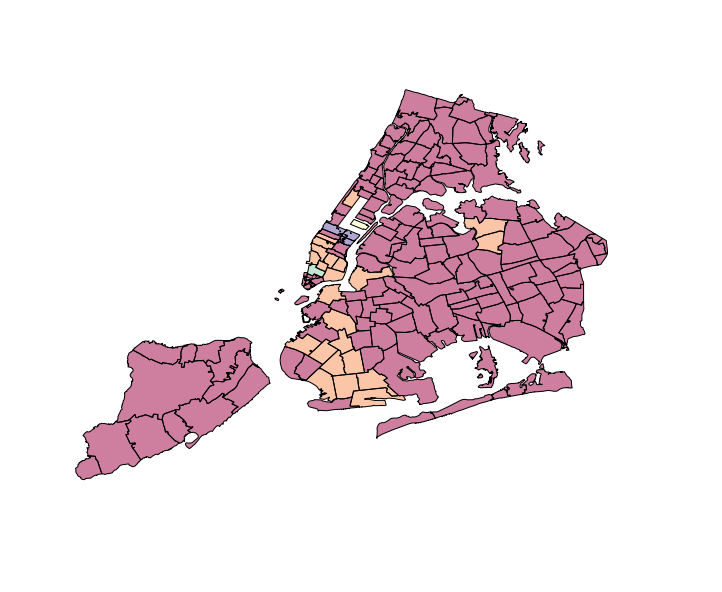

In [44]:
fig, ax = pl.subplots(figsize=(12,10))
NYC.plot(column='kmeansCode', axes=ax, colormap='Spectral')
ax.axis('off')

In [45]:
NYC_AP = nyc.merge(AP, on=['postalCode'])

In [46]:
NYC_AP

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode,AP_code,APcode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.874400,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,NaN,21
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.913900,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,NaN,22
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.412340,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,NaN,15
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.057700,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,NaN,22
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.594300,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,NaN,15
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,42659399.898200,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...,11373,NaN,21
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9155180.262630,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11001,NaN,22
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,55587771.835000,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ...",11375,NaN,15
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,39568339.274800,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...,11427,NaN,22
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,25203458.868900,26323.994393,Queens,POLYGON ((-73.86451198956482 40.73407164841783...,11374,NaN,15


(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

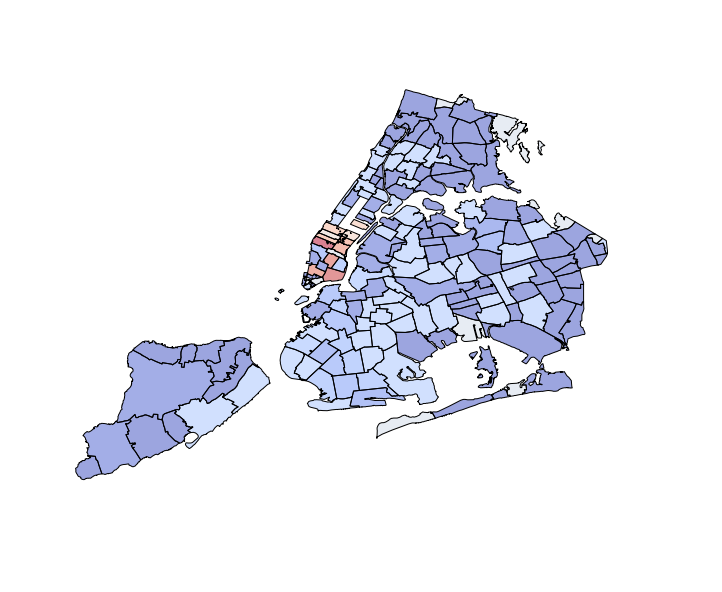

In [48]:
fig, ax = pl.subplots(figsize=(12,10))
NYC_AP.plot(column='APcode', axes=ax, colormap='coolwarm_r')
ax.axis('off')

The two clusters were similar, even though we declared the number of clusters for kmeans, 5 and 6, the affinity cluster produced 8 clusters. Furtermore, the maps look very similar.

The clusters around brooklyn heights area, presumably represent and increase in the number of establishments. This makes sense because since 1994 the area has been expanding because it was introduced as a business improvement district in 1991. 


The areas around midtown are a different color, is asumming they have a negative trend. Maybe this could be associated with the financial crisis in 2008? Or maybe rent was becoming too expensive so establishments had to move out?